# Will it be delayed?

Everyone who has flown has experienced a delayed or cancelled flight. Both airlines and airports would like to improve their on-time performance and predict when a flight will be delayed or cancelled several days in advance. You are being hired to build a model that can predict if a flight will be delayed. To learn more, you must schedule a meeting with your client (me). To schedule an appointment with your client, send an event request through Google Calendar for a 15 minute meeting. Both you and your project partner must attend the meeting. Come prepared with questions to ask your client. Remember that your client is not a data scientist and you will need to explain things in a way that is easy to understand. Make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

For this project you must go through most all steps in the checklist. You must write responses for all items as done in the homeworks, however sometimes the item will simply be "does not apply". Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Some changes to the checklist:

* Do not do the final part (launching the product).
* Your presentation will be done as information written in this document in a dedicated section (no slides or anything like that). It should include high-level summary of your results (including what you learned about the data, the "accuracy" of your model, what features were important, etc). It should be written for your client, not your professor or teammates. It should include the best summary plots/graphics/data points.
* The models and hyperparameters you should consider during short-listing and fine-tuning will be released at a later time (dependent on how far we get over the next two weeks).
* Data retrieval must be automatic as part of the code (so it can easily be re-run and grab the latest data). Do not commit any data to the repository.
* Your submission must include a pickled final model along with this notebook.

# Frame The Problem

1. **Define the objective in business terms.**
- The objective is to predict if a flight will be delayed or cancelled seven days in advance whether that be due to weather, mechanical issues, or other reasons. This will allow airlines and airports to better plan for the future and roll out delay or cancellation alerts to passengers more efficiently.
2. **How will your solution be used?**
- Our solution will be used to predict if a flight will be delayed or cancelled seven days in advance. This will allow airlines and airports to better plan for the future and roll out delay or cancellation alerts to passengers more efficiently.
3. **What are the current solutions/workarounds (if any)?**
- Currently, airlines and airports do not have a way to predict if a flight will be delayed or cancelled seven days in advance. They can only predict if a flight will be delayed or cancelled a few hours in advance.
4. **How should you frame this problem (supervised/unsupervised, online/offline, ...)?**
- This problem should be framed as a supervised learning problem. We will use historical data to predict if a flight will be delayed or cancelled seven days in advance. We will use a batch learning system to train the model as the system will be updated quarterly.
5. **How should performance be measured? Is the performance measure aligned with the business objective?**
- Performance should be measured using the precision score. As the client stated they would like to accurately predict if a flight will be delayed or cancelled seven days in advance as to not inconvenience or frustrate passengers. The precision score is aligned with the business objective as it measures the number of actual positive cases that were correctly predicted as positive. To mitigate the risk of false positives, the precision score will be used as it aligns with the business objective and the client's needs.
6. **What would be the minimum performance needed to reach the business objective?**
- As per the client the minimum peroformance needed to reach the business objective is 25%. As they currently do not have a way to predict if a flight will be delayed or cancelled seven days in advance, any improvement on the current system would be beneficial.
7. **What are comparable problems? Can you reuse experience or tools?**
- A comparable problem I have worked with was in the AWS machine learning challenge lab where the mock client wanted to create a feature to let customers know if the flight will be delayed because of weather when they book a flight to or from the busiest airports for domestic travel in the US.
- There are tools and experience that can be reused that I have used in past homework assignments as well as the methods used in the AWS machine learning challenge lab to analyze the data.
8. **Is human expertise available?**
- No, human expertise is not available as the client is knowledgeable about the problem but does not thoroughly know the data being provided. But, my professor is knowledgeable in this area and can provide guidance and help if needed.
9. **How would you solve the problem manually?**
- To solve the problem manually, I would look at the historical data and see if there are any patterns or trends that can be used to predict if a flight will be delayed or cancelled seven days in advance. Finding as many patterns or trends as possible would be beneficial to predict if a flight will be delayed or cancelled as there could be multiple reasons why a flight would be delayed or cancelled. Although, it must be noted that real-time issues such as mechanical issues or staffing issus would be impossible to predict in advance. Although, a general trend could be found to imply a potential delay or cancellation due to these issues.
10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.**

- bureau of transportation statistics
- carrier issues 
- extreme weather
- airport wind issues
- security or tsa
- late arrival (delay only)
* holidays
* weather
* don't consider diverted flight data
- no international fights
- size of airlines
- small airlines important
- make sure air crafts of an N to start the planes id
- seasonal and holiday travel

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# aircraft data read csv
def read_aircraft_data():
    return pd.read_csv('aircrafts.csv')

def get_el_nino_data():
    url = 'https://psl.noaa.gov/data/correlation/nina4.data'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    data = soup.text.split('\n')
    data = data[3:-4]
    data = [i.split() for i in data]
    df = pd.DataFrame(data, columns=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    df = df.replace('-99.99', 'NaN')
    df.to_csv('nina4.csv', index=False)
    return pd.read_csv('elnino.csv')

In [20]:
data = read_aircraft_data()
data.head()

,id,reg,active,serial,hexIcao,airlineName,iataCodeShort,icaoCode,model,modelCode,...,registrationDate,typeName,numEngines,engineType,isFreighter,productionLine,ageYears,verified,numRegistrations,firstRegistrationDate
0,9724,N840MH,True,29718.0,AB80F4,Delta Air Lines,764,B764,B764,B767-432ER,...,2001-05-23,Boeing 767-400,2.0,Jet,False,Boeing 767,24.0,True,1,2001-05-23
1,11301,N857DZ,True,31968.0,ABC1BC,Delta Air Lines,737,NaN,B739,B737-932ER,...,2016-04-07,Boeing 737,2.0,Jet,False,Boeing 737,9.0,True,1,2016-04-07
2,2118392,N432QX,False,4166.0,A52C00,Horizon Air,DH4,DH8D,DHC8,DHC-8 402,...,2007-07-31,De Havilland Canada DHC-8-400 Dash 8Q,2.0,Turboprop,False,Bombardier DHC-8,17.6,True,1,2007-07-31
3,5408,N591JB,True,2246.0,A7A1E8,JetBlue Airways,320,A320,A320,320-232,...,2004-08-04,Airbus A320,2.0,Jet,False,Airbus A320,20.7,True,1,2004-08-04
4,10821,N317AS,True,30856.0,A360E3,Alaska Airlines,739,B739,B739,B737-990,...,2003-03-26,Boeing 737-900,2.0,Jet,False,Boeing 737 NG,22.0,True,1,2003-03-26


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6655 non-null   int64  
 1   reg                    6655 non-null   object 
 2   active                 6655 non-null   bool   
 3   serial                 6641 non-null   float64
 4   hexIcao                6623 non-null   object 
 5   airlineName            6655 non-null   object 
 6   iataCodeShort          6499 non-null   object 
 7   icaoCode               6188 non-null   object 
 8   model                  6464 non-null   object 
 9   modelCode              6641 non-null   object 
 10  numSeats               4398 non-null   float64
 11  rolloutDate            4697 non-null   object 
 12  firstFlightDate        4192 non-null   object 
 13  deliveryDate           5497 non-null   object 
 14  registrationDate       6616 non-null   object 
 15  type

In [ ]:
(data['id'].value_counts() == 2).sum() # a few double entries

50

<Axes: >

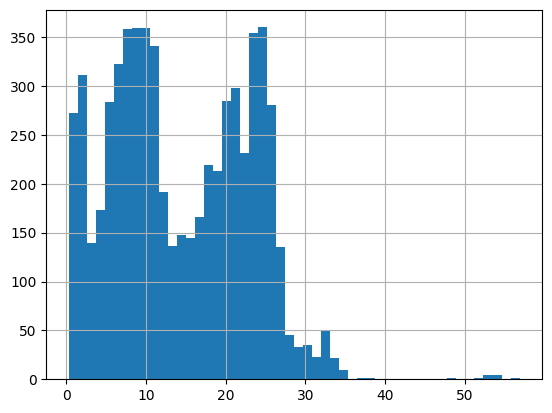

In [41]:
age_data = data[data['ageYears'] < 500]
age_data['ageYears'].hist(bins=50)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'serial'}>],
       [<Axes: title={'center': 'numSeats'}>,
        <Axes: title={'center': 'numEngines'}>],
       [<Axes: title={'center': 'ageYears'}>,
        <Axes: title={'center': 'numRegistrations'}>]], dtype=object)

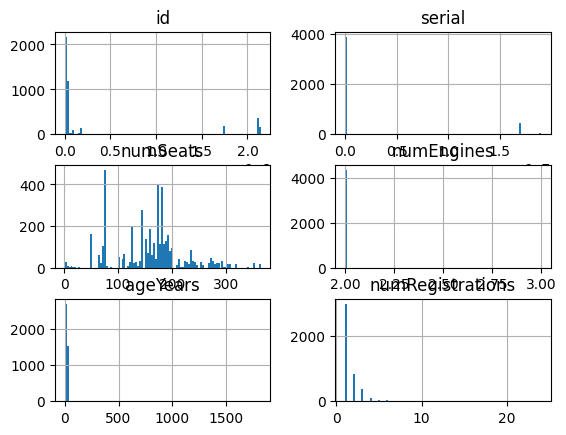

In [39]:
# bar chart on airlineName frequency
data[data['numSeats'] < 500].hist(bins=100)

Individual Attributes
=====================
\* Dervived from the other features

Air Crafts
----------
| Attribute             | Type        | Missing | Noise | Use  | Distribution             |
| --------------------- | ----------- | ------- | ----- | ---- | ------------------------ |
| id                    | Text        | None    | None  |      | Unique except 50 doubles |
| reg                   | Text        | None    | None  |      | Unique                   |
| active                | Boolean     | None    | None  |      | 93% true                 |
| serial                | Text        | 14      | None  |      | Unique                   |
| hexIcao               | Text        | 32      | None  |      | Unique                   |
| airlineName           | Categorical | None    | None  | high | Top heavy                |
| iataCodeShort         | Categorical | 2%      | None  |      | Top heavy                |
| icaoCode              | Categorical | 7%      | None  |      | Top heavy                |
| model                 | Categorical | 3%      | None  |      | Top heavy                |
| modelCode             | Categorical | 14      | None  |      | Exponential decay        |
| numSeats              | Int         | 34%     | None  |      | Loosely normal           |
| rolloutDate           | Date        | 29%     | None  |      | Unique                   |
| firstFlightDate       | Date        | 37%     | None  |      |                          |
| deliveryDate          | Date        | 17%     | None  |      |                          |
| registrationDate      | Date        | 39      | None  |      |                          |
| typeName              | Categorical | None    | None  |      | Top heavy                |
| numEngines            | Int         | 3%      | None  |      | All but 5 the same       |
| engineType            | Categorical | 3%      | None  |      | Nearly all the same      |
| isFreighter           | Boolean     | None    | None  |      | 36 Trues                 |
| productionLine        | Categorical | 2%      | None  |      | Top heavy                |
| ageYears              | Float       | 5%      | .1    |      | Peaks and Valleys        |
| verified              | Boolean     | None    | None  |      | 29 false values          |
| numRegistrations      | Int         | None    | None  |      | low value top heavy      |
| firstRegistrationDate | Date        | 30      | None  |      | Near unique              |

Summary of the individual attributes of the weather data. Many more details are available in the analysis in the subsequent cells.

| Attribute | Type | Missing | Noise | Usefulness | Distribution |
| --------- | ---- | ------- | ----- | ---------- | ------------ |
| value     |      |         |       |            |              |